# Notebook Projet - HumanForYou

### Auteurs :
- BRASSEUR **Louis**
- BOUIC **Nathan**
- TANTON **Quentin**
- FRIEDRICH **Kevin**

#### Date : 13/03/2023

# Sommaire 
### *1. Contexte et introduction*
### *2. Data Wrangling*
### *3. Analyse du traitement des données et des indicateurs importants*
### *4. Test de modèles*
### *5. Comparaison des modèles*
### *6. Validation du modèle*
### *7. Conclusion*


# 1: *Contexte et introduction*

***Contexte*** : L'entreprise de produits pharmaceutiques HumanForYou basée en Inde emploie environ 4000 personnes. Cependant, chaque année elle subit un turn-over d'environ 15% de ses employés nécessitant de retrouver des profils similaires sur le marché de l'emploi.

***Objectifs*** : L'objectif de ce projet est de mettre en place un modèle de prédiction de la probabilité de départ d'un employé afin que l'entreprise puisse anticiper ces départs et ainsi ajuster ses criètes afin de conserver ses employés. Et ainsi réduire le turn-over.

***Introduction*** : Pour réaliser cet objectif, un jeu de données nous est proposé avec diverses informations. Nous allons devoir mener une étude qui vise à comprendre les données, à les nettoyer et à les préparer pour la suite de notre projet. Nous allons ensuite mettre en place des modèles de prédiction afin de prédire la probabilité de départ d'un employé. Nous allons ensuite comparer les différents modèles et enfin valider le modèle le plus pertinent. 


# 2: *Data Wrangling*

Pour comprendre les raisons de ce turn-over nous allons étudier les différentes données concernant les employés de cette entreprise, dans un premier temps nous allons trier, transformer et rendre ces données le plus propre possible afin d'avoir les meilleurs résultats possibles par la suite. Cette tâche est appelée le **Data Wrangling**.

Pour se faire nous allons tout d'abord faire une première analyse de nos données et donc créer des classes de données : 
- Quantitative continue
- Quantitative Discrète
- Qualitatives Ordinales
- Qualitatives Nominales

On liste donc pour chacun de nos 5 fichiers CSV le type de données, cela nous permet de mieux comprendre le set de données mais aussi et surtout de savoir sur lesquelles nous allons devoir appliquer un traitement :

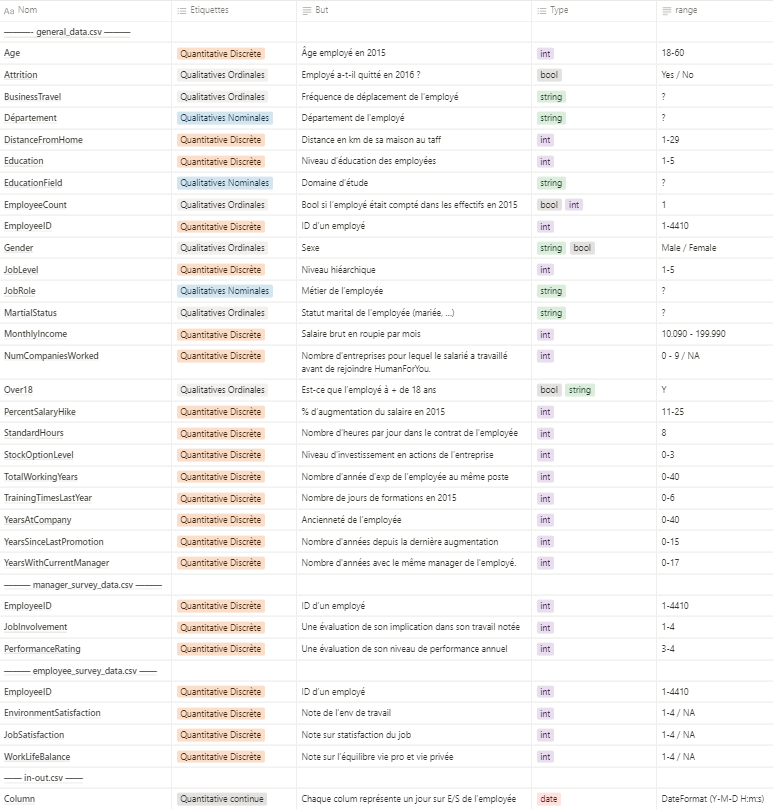

Avant le traîtement des ces données on va essayer de regrouper les données de nos fichiers CSV, on remarque que les fichiers in_time.csv et out_time.csv ont la même forme et contiennent respectivement l'heure d'entrée et de sortie de chaque employée chaque jour de l'année.
On décide de traîter ces deux fichier séparément et d'en sortir une information simplifiée : **une moyenne de temps au travail par jour par employée**.
On va donc faire l'heure de départ - l'heure d'arrivée par jour et faire la moyenne sur l'année afin de récupérer un tableau contenant seulement l'identifiant de l'employée et la valeur moyenne en heure, ce traîtement sera détaillé plus tard dans le notebook.Et c'est ce qu'on obtient dans le fichier ***'working_hours.csv'***.

Avec les trois fichiers restants (general_data.csv, manager_survey_data.csv, employee_survey_data.csv) on effectue une jointure sur l'identifiant employée, cela nous donne un gros tableau de données contenant toutes nos informations et sur lequel nous allons pouvoir travailler par la suite. (cf. code ci-dessous)
Après avoir importé les données (load) on utilise info pour avoir un apperçu de notre dataset et on remarque que certaines colonnes ont des données manquantes.

In [948]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Paths des différents fichiers
general_data_csv = "./dataset/general_data.csv"
employee_survey_data_csv = "./dataset/employee_survey_data.csv"
manager_survey_data_csv = "./dataset/manager_survey_data.csv"
working_hours_data_csv = "./dataset/working_hours.csv"



# Chargement des données
data = pd.read_csv(general_data_csv, sep=',')
employee_survey_data = pd.read_csv(employee_survey_data_csv, sep=',')
manager_survey_data = pd.read_csv(manager_survey_data_csv, sep=',')
working_hours_data = pd.read_csv(working_hours_data_csv, sep=',')

# Merge des données
data = pd.merge(data, employee_survey_data, on='EmployeeID')
data = pd.merge(data, manager_survey_data, on='EmployeeID')
data = pd.merge(data, working_hours_data, on='EmployeeID')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

On voit que l'on a bien tout de centralisé et on va donc ensuite déparer notre jeu de donnée, on choisit de prendre 80% du total pour l'entraînement de nos algorithmes et 20% pour tester les résultats, on va pouvoir analyser les performances de chaque algorithme et vérifier qu'il n'est ni en overfitting ni en underfitting.

In [949]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# On sépare les données en train et test
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data,data['Attrition']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

# On a donc nos variables data_train_set et data_test_set pour le train et le test
data_train_set = strat_train_set.copy()
data_test_set = strat_test_set.copy()

data = data_train_set 
data_labels = strat_train_set["Attrition"].copy()

On va ensuite supprimer les colonnes non pertinentes a notre étude, en effet 4 colonnes on la même valeur pour chacun des employés et on peut donc en déduire que les garder n'aura aucun impact sur les résultats de l'étude. Ces colonnes sont : Over18, StandardHours, EmployeeCount et EmployeeID.

In [950]:
# On supprime les colonnes inutiles
data = data_train_set.drop(['EmployeeCount','Over18','StandardHours','EmployeeID'], axis=1)

L'étape suivante est la plus importantes pour notre dataset, en effet c'est içi que les plus grosses modifications vont être apportées dessus.
Premièrement on va remplacer les données manquantes par la valeur moyenne afin de ne pas impacter sur la moyenne globale, cette méthode s'appelle la "Mean imputation".

On va ensuite s'intéresser à nos données qualitatives, comme dit précémment notre algorithme sera beaucoup plus efficace si nous lui donnons en entrée uniquement des valeurs quantitatives.

Pour les Qualitatives Ordinales on utilise "l'ordinal encoder" qui va traduire chaque texte en valeur (ex: nul, faible, fort -> 0,1,2)

Pour les Qualitatives Nominales on utilise le "hot one encoder" qui va créer une nouvelle colonne pour chaque option (ex: homme, femme -> ajout de deux nouvelles colonnes homme et femme avec comme valeurs : 


| Homme  | Femme  |
| :---: |:---:|
| 1  |  0  |
| 0  |  1  |

On va faire une "pipeline" pour chaque champ, c'est une tâche assez longue mais elle nous permettera d'automatiser toute cette partie de lavage de données et surtout de faire le traitement adapté pour chaque donnée. Pour savoir quel est le traîtement faire sur chaque champ on va s'aider du type de donnée et de l'apperçu des valeurs possibles. (cf images ci-dessous)

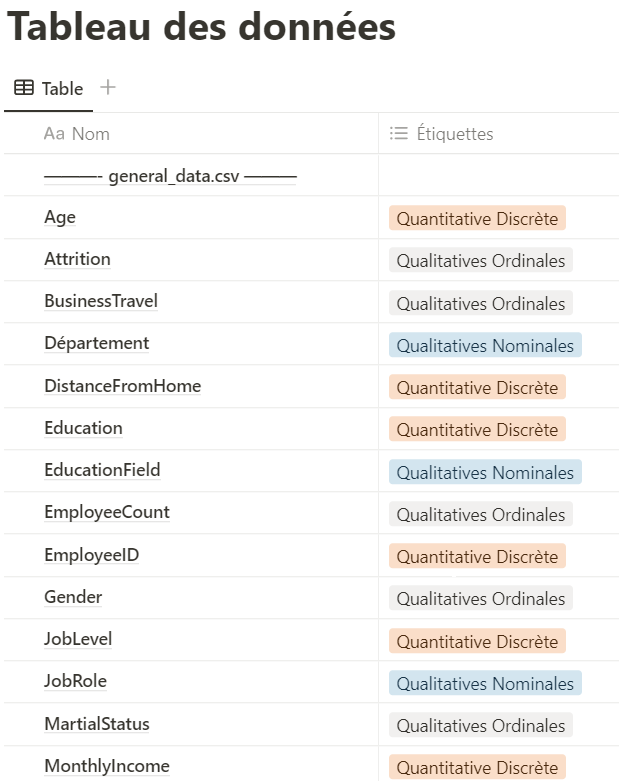

Dans la section de code suivante nous avions eu l'idée de créer des catégories pour certaines variables afin de les rendre plus compréhensibles. Cependant, nous avons décidé de ne pas les utiliser car nous nous sommes rendu compte qu'il était plus difficile d'intérpreter les résultats par la suite.

In [951]:
# On créer des groupes pour certaines variables catégorielles
from sklearn.impute import SimpleImputer

# data['Age'] = pd.cut(data['Age'], [17, 24, 34, 44, 54, 60], labels=['18-24', '25-34', '35-44', '45-54', '55-60'])
# data['DistanceFromHome'] = pd.cut(data['DistanceFromHome'], [-1,10,20,30], labels=['0-10', '11-20', '21-30'])
# data['MonthlyIncome'] = pd.cut(data['MonthlyIncome'], [10000, 50000, 90000, 130000, 170000, 200000], labels=['10000-50000', '50001-90000', '90001-130000', '130001-170000', '170001-200000'])
# data['PercentSalaryHike'] = pd.cut(data['PercentSalaryHike'], [9,15,20,25], labels=['10-15', '16-20', '21-26'])

imputer = SimpleImputer(strategy="median")
data['TotalWorkingYears'] = imputer.fit_transform(data[['TotalWorkingYears']])
# data['TotalWorkingYears'] = pd.cut(data['TotalWorkingYears'], [-1,10,20,30,40], labels=['0-10', '11-20', '21-30', '31-40'])

# data['YearsAtCompany'] = pd.cut(data['YearsAtCompany'], [-1,10,20,30,40], labels=['0-10', '11-20', '21-30', '31-40'])
# data['YearsSinceLastPromotion'] = pd.cut(data['YearsSinceLastPromotion'],[-1,2,5,10,15], labels=['0-2', '3-5', '6-10', '11-15'])
# data['YearwithCurrManager'] = pd.cut(data['YearsWithCurrManager'],[-1,2,5,10,17], labels=['0-2', '3-5', '6-10', '11-17'])
# data['daily_working_hours'] = pd.cut(data['daily_working_hours'],[4,6,7,8,9,11], labels=['5-6', '6-7', '7-8', '8-9', '9-11'])


Puis voici les pipeline pour toutes les données afin qu'elle produise un jeu de donnée nétoyé et interpretable nomée "***data_prepared***".

In [952]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
import sklearn
sklearn.set_config(transform_output="pandas")

# Ici on va créer des pipelines pour transformer nos données

# ----- Age pipeline -----
age_pipeline = Pipeline([
        # ('ordinal', OrdinalEncoder()),
        ('std_scaler', StandardScaler()),
    ])

# ----- Attrition pipeline -----
attrition_pipeline = Pipeline([
        ('ordinal', OrdinalEncoder()),
        # ('std_scaler', StandardScaler()),
    ])

# ----- BusinessTravel pipeline -----
businessTravel_pipeline = Pipeline([
        ('ordinal', OrdinalEncoder()),
        ('std_scaler', StandardScaler()),
    ])

# ----- DailyWorkHours pipeline -----
dailyWorkHours_pipeline = Pipeline([
        # ('ordinal', OrdinalEncoder()),
        ('std_scaler', StandardScaler()),
    ])

# ----- Department pipeline -----
department_pipeline = Pipeline([
        ('ordinal', OneHotEncoder(sparse_output=False))
    ])

# ----- DistanceFromHome pipeline -----
DistanceFromHome_pipeline = Pipeline([
        # ('ordinal', OrdinalEncoder()),
        ('std_scaler', StandardScaler()),
    ])

# ----- Education pipeline -----
education_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

# ----- EducationField pipeline -----
educationField_pipeline = Pipeline([
    ('nominal', OneHotEncoder(sparse_output=False))
])

# ----- Gender pipeline -----
gender_pipeline = Pipeline([
        ('ordinal', OrdinalEncoder()),
        ('std_scaler', StandardScaler()),
    ])

# ----- JobLevel pipeline -----
jobLevel_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

# ----- JobRole pipeline -----
jobRole_pipeline = Pipeline([
    ('nominal', OneHotEncoder(sparse_output=False))
])

# ----- MaritalStatus pipeline -----
maritalStatus_pipeline = Pipeline([
        ('nominal', OneHotEncoder(sparse_output=False))
    ])

# ----- MonthlyIncome pipeline -----
monthlyIncome_pipeline = Pipeline([
        ('ordinal', OrdinalEncoder()),
        # ('std_scaler', StandardScaler()),
    ])

# ----- NumCompaniesWorked pipeline -----
numCompaniesWorked_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler())
    ])

# ----- PercentSalaryHike pipeline -----
percentSalaryHike_pipeline = Pipeline([
        # ('ordinal', OrdinalEncoder()),
        ('std_scaler', StandardScaler()),
    ])

# ----- StockOptionLevel pipeline -----
stockOptionLevel_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

# ----- TotalWorkingYears pipeline -----
totalWorkingYears_pipeline = Pipeline([
        # ('ordinal', OrdinalEncoder()),
        ('std_scaler', StandardScaler())
    ])

# ----- TrainingTimesLastYear pipeline -----
trainingTimesLastYear_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

# ----- YearsAtCompany pipeline -----
yearsAtCompany_pipeline = Pipeline([
        # ('ordinal', OrdinalEncoder()),
        ('std_scaler', StandardScaler())
    ])

# ----- YearsSinceLastPromotion pipeline -----
yearsSinceLastPromotion_pipeline = Pipeline([
        # ('ordinal', OrdinalEncoder()),
        ('std_scaler', StandardScaler())
    ])

# ----- YearsWithCurrManager pipeline -----
yearsWithCurrManager_pipeline = Pipeline([
        # ('ordinal', OrdinalEncoder()),
        ('std_scaler', StandardScaler())
    ])

# ----- JobInvolvement pipeline -----
jobInvolvement_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

# ----- PerformanceRating pipeline -----
performanceRating_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

# ----- EnvironmentSatisfaction pipeline -----
environmentSatisfaction_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler())
    ])

# ----- JobSatisfaction pipeline -----
jobSatisfaction_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler())
    ])

# ----- WorkLifeBalance pipeline -----
workLifeBalance_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler())
    ])

full_pipeline = ColumnTransformer(transformers=[
        ("Age", age_pipeline, ['Age']),
        ("Attrition", attrition_pipeline, ['Attrition']),
        ("BusinessTravel", businessTravel_pipeline, ['BusinessTravel']),
        ("Department", department_pipeline, ['Department']),
        ("DistanceFromHome", DistanceFromHome_pipeline, ['DistanceFromHome']),
        ("Education", education_pipeline, ['Education']),
        ("EducationField", educationField_pipeline, ['EducationField']),
        ("Gender", gender_pipeline, ['Gender']),
        ("JobLevel", jobLevel_pipeline, ['JobLevel']),
        ("JobRole", jobRole_pipeline, ['JobRole']),
        ("MaritalStatus", maritalStatus_pipeline, ['MaritalStatus']),
        ("MonthlyIncome", monthlyIncome_pipeline, ['MonthlyIncome']),
        ("NumCompaniesWorked", numCompaniesWorked_pipeline, ['NumCompaniesWorked']),
        ("PercentSalaryHike", percentSalaryHike_pipeline, ['PercentSalaryHike']),
        ("StockOptionLevel", stockOptionLevel_pipeline, ['StockOptionLevel']),
        ("TotalWorkingYears", totalWorkingYears_pipeline, ['TotalWorkingYears']),
        ("TrainingTimesLastYear", trainingTimesLastYear_pipeline, ['TrainingTimesLastYear']),
        ("YearsAtCompany", yearsAtCompany_pipeline, ['YearsAtCompany']),
        ("YearsSinceLastPromotion", yearsSinceLastPromotion_pipeline, ['YearsSinceLastPromotion']),
        ("YearsWithCurrManager", yearsWithCurrManager_pipeline, ['YearsWithCurrManager']),
        ("JobInvolvement", jobInvolvement_pipeline, ['JobInvolvement']),
        ("PerformanceRating", performanceRating_pipeline, ['PerformanceRating']),
        ("EnvironmentSatisfaction", environmentSatisfaction_pipeline, ['EnvironmentSatisfaction']),
        ("JobSatisfaction", jobSatisfaction_pipeline, ['JobSatisfaction']),
        ("WorkLifeBalance", workLifeBalance_pipeline, ['WorkLifeBalance']),
        ("DailyWorkHours", dailyWorkHours_pipeline, ['daily_working_hours'])
    ], verbose_feature_names_out=False)

# ----- Pipeline Global -----
data_prepared = full_pipeline.fit_transform(data)

On peut ensuite vérifier que tous les records sont remplies et sont sous formes de nombres.

In [953]:
data_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3528 entries, 3465 to 1125
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                3528 non-null   float64
 1   Attrition                          3528 non-null   float64
 2   BusinessTravel                     3528 non-null   float64
 3   Department_Human Resources         3528 non-null   float64
 4   Department_Research & Development  3528 non-null   float64
 5   Department_Sales                   3528 non-null   float64
 6   DistanceFromHome                   3528 non-null   float64
 7   Education                          3528 non-null   float64
 8   EducationField_Human Resources     3528 non-null   float64
 9   EducationField_Life Sciences       3528 non-null   float64
 10  EducationField_Marketing           3528 non-null   float64
 11  EducationField_Medical             3528 non-null   fl

On a vérifié que notre jeu de donnée est maintenant nétoyée et prêt à être utilisé

# 3: *Analyse du traitement des données et des indicateurs importants*

On va donc maintenant faire une pré-analyse de nos données afin de voir si il y a des variables qui sont corrélées entre elles.

In [954]:
corr_matrix = data_prepared.corr()
corr_matrix['Attrition'].sort_values(ascending=False)

Attrition                            1.00
daily_working_hours                  0.21
MaritalStatus_Single                 0.18
EducationField_Human Resources       0.09
Department_Human Resources           0.07
NumCompaniesWorked                   0.04
Gender                               0.03
JobRole_Sales Executive              0.03
JobRole_Research Director            0.02
JobRole_Research Scientist           0.02
PercentSalaryHike                    0.02
EducationField_Life Sciences         0.01
PerformanceRating                    0.01
Education                            0.00
JobInvolvement                      -0.00
JobRole_Sales Representative        -0.00
BusinessTravel                      -0.00
Department_Research & Development   -0.01
EducationField_Other                -0.01
EducationField_Marketing            -0.01
JobRole_Laboratory Technician       -0.01
EducationField_Medical              -0.01
JobRole_Healthcare Representative   -0.01
DistanceFromHome                  

On peut donc se rendre compte qu'il y a quelques valeurs qui sont corrélées avec l'attribut Attrition. On a par exemple daily_working_hours ainsi que MaritalStatus qui semble être corrélé avec les départs des employés. Et on peut aussi s'apercevoir que TotalWorkingYears, l'Age, YearsWithCurrManager, YearsAtCompany et Jobsatisfaction sont anti-correlés avec le nombre de départs.

On peut intépreter cela de la manière suivante : 
- Plus la moyenne d'heures travailé par jour est élevée, plus il y a de chance d'avoir un départs.
- Beaucoup de personnes célibataires ont quittés l'entreprise. Etant donné leur statut c'est dernier peuvent être plus libre.
- Plus les employés sont jeunes, plus il y a de chance d'avoir un départ.
- Plus le nombre d'année travaillés est faible, plus il y a de chance d'avoir un départ.
- Plus le nombre d'année passé avec le même manager est faible, plus il y a de chance d'avoir un départ.
- Plus la satisfaction au travail est faible, plus il y a de chance d'avoir un départ.

# 4. *Tests de modèles*

Maintenant l'objectif est de pouvoir trouver le modèle le plus adéquat afin de modéliser notre classification afin de savoir si oui ou non un employé va quitter l'entreprise. Pour se faire nous allons utiliser différents indicateurs pour mesurer la pertinence des modèles testés. Pour les modèles que nous allons choisir, nous allons prendre certains modèles usuels et prendre une estimations de certains modèles et ensuite les vérifier.

Pour se faire nous allons utiliser les indicateurs de pertinence suivants :
- Accuracy : Qui va nous donner notre taux de réussite
- Precision : Qui va nous donner la précision de notre modèle
- Recall : Qui va nous donner la sensibilité de notre modèle
- F1-score : Qui va nous donner la moyenne harmonique de la précision et du recall
- ROC-AUC : Qui va nous donner la surface sous la courbe ROC.


On va dans un premier lieu passer nos labels sous forme de valeurs numérique afin de pouvoir les utiliser dans nos modèles.

In [955]:
data_prepared = data_prepared.drop(['Attrition'], axis=1)


data_labels = strat_train_set['Attrition'].copy().replace({'Yes': 1, 'No': 0})
data_labels

3465    0
3485    0
3052    1
2012    1
426     0
       ..
743     0
613     1
808     0
2946    1
1125    0
Name: Attrition, Length: 3528, dtype: int64

Ensuite on utilise le LazyClassifier afin de pouvoir tester tous les modèles de classification de la librairie sklearn. On va ensuite afficher les résultats de nos modèles.

In [956]:

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_prepared, data_labels, test_size=0.2, random_state=42)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:04<00:00,  6.63it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.98,0.95,0.95,0.98,0.12
XGBClassifier,0.98,0.95,0.95,0.98,0.17
DecisionTreeClassifier,0.97,0.94,0.94,0.97,0.04
RandomForestClassifier,0.97,0.93,0.93,0.97,0.40
BaggingClassifier,0.97,0.92,0.92,0.97,0.17
LabelSpreading,0.96,0.92,0.92,0.96,0.71
LabelPropagation,0.96,0.92,0.92,0.96,0.63
ExtraTreeClassifier,0.96,0.91,0.91,0.96,0.02
ExtraTreesClassifier,0.97,0.91,0.91,0.97,0.31


On en déduit que certains modèles semble plus performant que d'autres. On va donc tester ces modèles pour voir si les résultats sont cohérents.

In [957]:
# try LinearSVC 
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

svm_clf = LinearSVC(random_state=42)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8526912181303116

On commence par implémenter le modèle, on lui donne les données d'entrainement puis on évalue sa performance avec le "accuracy score", pour avoir une valeur représentative on utilise les données de test pour le calculer. Plus le score d'accuracy tend vers 1 plus notre modèle va souvent avoir raison, 1 correspondant donc à 100% du temps. 

In [958]:
from sklearn.model_selection import cross_val_score
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.716135378292359

On va ensuite appliquer la "cross validation", cette méthode consiste a découper notre jeu de données en cv parties (içi 10) et de tester chaque combinaison : la première partie en tant que test et les 9 suivantes en entraînement etc etc...
L'intérêt de la cross validation est d'évaluer si notre modèle n'est pas en overfitting c'est a dire qu'il apprend le jeu de données par coeur et a un très bon score dans ce cas pratique mais ne sera pas du tout aussi précis utilisé sur d'autres jeux de données.
Comme pour la précision on cherche a obtenir un score de cross validation le plus proche de 1.

In [959]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv=10)
y_train_pred.shape

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[1900,  457],
       [ 344,  121]], dtype=int64)

Puis on affiche nos résultats sous cette forme :

|_label_|classé FAUX|classé VRAI|
|---|---|---|
|**FAUX**|**vrai NEGATIF**|_faux POSITIF_|
|**VRAI**|_faux NEGATIF_|**vrai POSITIF**|

Ainsi : moins on a de Faux POSITIFS et Faux NEGATIFS plus le modèle est performant 

In [960]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_train_pred)

0.2093425605536332

Le precision score est un autre indicateur, à ne pas confondre avec l'accuracy score. Ce score correspond à : à quelle fréquence une prédiction positive sera correcte.
Comme l'accuracy score et le cross validation score, plus il tend vers 1, plus le modèle est performant.

In [961]:
recall_score(y_train, y_train_pred)

0.26021505376344084

On s'intéresse ensuite au recall score, il mesure la capacité du modèle à détecter les échantillons positifs. Plus le recall score est élevé, plus les échantillons positifs détectés sont nombreux.

In [962]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.23202301054650046

Le F1 score combine les scores de précision et de recall d'un modèle. Il calcule le nombre de fois qu'un modèle a effectué une prédiction correcte sur l'ensemble de l'ensemble de données. Plus il tend vers 1 plus le modèle est performant

In [963]:
from sklearn.metrics import precision_recall_curve

y_scores = svm_clf.decision_function([X_train.iloc[0]])
y_scores

y_scores = cross_val_predict(svm_clf, X_train, y_train, cv=10, method="decision_function")
y_scores

array([-0.42248712, -1.11560265,  1.00063558, ..., -1.39721178,
       -2.89288039, -0.16365384])

On trace ensuite les courbes de précision et de recall en fonction du threshold, cette modélisation va nous permettre de voir le point de d'intersection entre ces deux là.
Ce graphique nous permet de fixer le seuil en fonction du compromis que nous souhaitons obtenir.

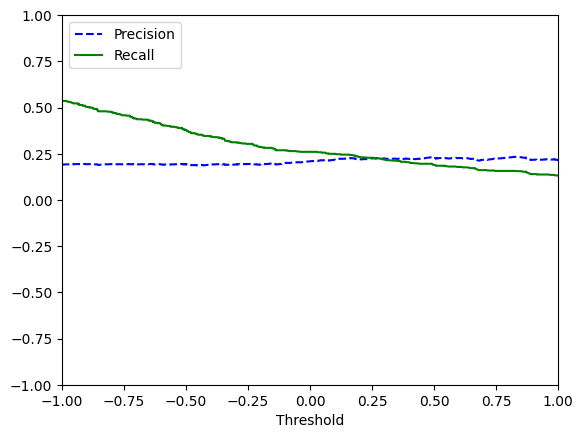

In [964]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([-1, 1])
    plt.xlim([-1, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


On va ensuite modéliser la précision en fonction du recall, cette autre méthode permet de voir si des grosses variations apparaissent à un certain seul d'un des deux facteurs.

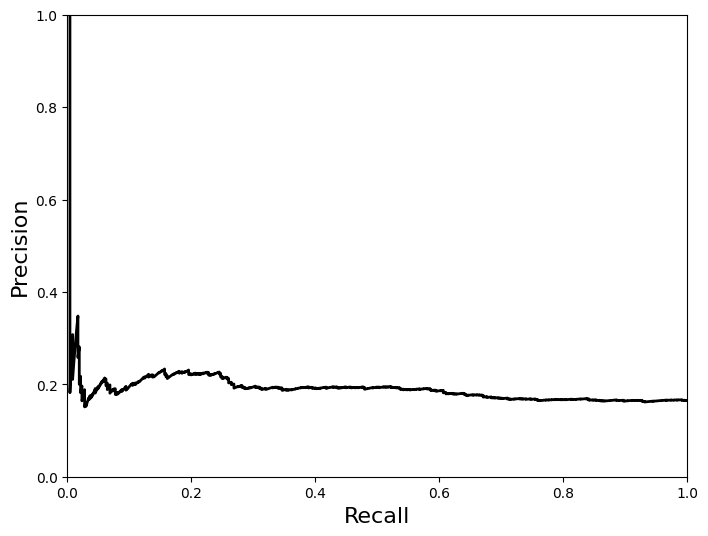

In [965]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "k-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)

Enfin on affiche le Recall en fonction du Fall-out, cette courbe est assez représentative des performances d'un modèle et va nous permettre de comparer les moodèles ensemble, plus la courbe tend vers le haut gauche plus on aura de vrai positifs donc plus le modèle sera qualitatif.

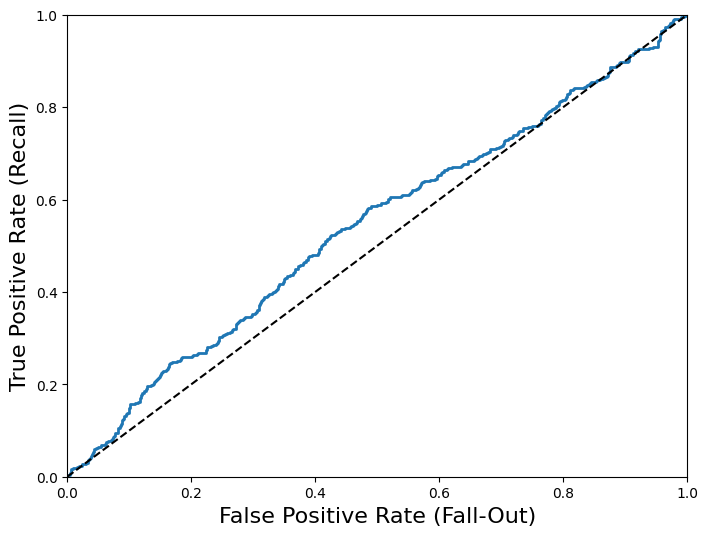

In [966]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1]) # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)

Après avoir calculé les différents scores et modélisé chacun de nos modèles on va pouvoir les comparé et séléctionner le plus performant dans notre cas de figure. Selon des indicateurs et notre courbe finale on déduit que le meilleur modèle pour nous est le RandomForestClassifier, on va donc se pencher plus en détail sur celui-ci et tenter de l'améliorer encore plus en le personnalisant.

In [967]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

# On va créer un tableau qui va rassembler toutes les informations
Results_arr = np.array([['Model','Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC']])

Results_arr = np.append(Results_arr, [['LinearSVC', accuracy_score(y_test, y_pred), precision_score(y_train, y_train_pred), recall_score(y_train, y_train_pred), f1_score(y_train, y_train_pred), roc_auc_score(y_train, y_scores)]], axis=0)

In [968]:
# try RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=10, method="predict_proba")

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=10)
y_probas_forest

Results_arr = np.append(Results_arr, [['Random Forest',accuracy_score(y_train, y_probas_forest), precision_score(y_train, y_probas_forest), recall_score(y_train, y_probas_forest), f1_score(y_train,y_probas_forest), roc_auc_score(y_train, y_scores_forest)]], axis=0)

Maintenant que nous avons vu la démarche précisement sur un modèle, nous allons effectuer la même démarche sur les autres modèles et ainsi les comparés afin de voir lequel est le plus performant pour notre classification.

In [969]:
# try DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
y_probas_tree = cross_val_predict(tree_clf, X_train, y_train, cv=10, method="predict_proba")

y_scores_tree = y_probas_tree[:, 1] # score = proba of positive class
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_train, y_scores_tree)

y_probas_tree = cross_val_predict(tree_clf, X_train, y_train, cv=10)
y_probas_tree

Results_arr = np.append(Results_arr, [['Decission Tree',accuracy_score(y_train, y_probas_tree), precision_score(y_train, y_probas_tree), recall_score(y_train, y_probas_tree), f1_score(y_train,y_probas_tree), roc_auc_score(y_train, y_scores_tree)]], axis=0)

In [970]:
# try LGMBClassifier

from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(random_state=42)
y_probas_lgbm = cross_val_predict(lgbm_clf, X_train, y_train, cv=10, method="predict_proba")

y_scores_lgbm = y_probas_lgbm[:, 1] # score = proba of positive class
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_train, y_scores_lgbm)

y_probas_lgbm = cross_val_predict(lgbm_clf, X_train, y_train, cv=10)
y_probas_lgbm

Results_arr = np.append(Results_arr, [['LGBM',accuracy_score(y_train, y_probas_lgbm) ,precision_score(y_train, y_probas_lgbm), recall_score(y_train, y_probas_lgbm), f1_score(y_train,y_probas_lgbm), roc_auc_score(y_train, y_scores_lgbm)]], axis=0)

In [971]:
# try XGBClassifier

from xgboost import XGBClassifier

xgb_clf = XGBClassifier(random_state=42)
y_probas_xgb = cross_val_predict(xgb_clf, X_train, y_train, cv=10, method="predict_proba")

y_scores_xgb = y_probas_xgb[:, 1] # score = proba of positive class
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_train, y_scores_xgb)

y_probas_xgb = cross_val_predict(xgb_clf, X_train, y_train, cv=10)
y_probas_xgb

Results_arr = np.append(Results_arr, [['XGB',accuracy_score(y_train, y_probas_xgb), precision_score(y_train, y_probas_xgb), recall_score(y_train, y_probas_xgb), f1_score(y_train,y_probas_xgb), roc_auc_score(y_train, y_scores_xgb)]], axis=0)

In [972]:
# try KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
y_probas_knn = cross_val_predict(knn_clf, X_train, y_train, cv=10, method="predict_proba")

y_scores_knn = y_probas_knn[:, 1] # score = proba of positive class
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train, y_scores_knn)

y_probas_knn = cross_val_predict(knn_clf, X_train, y_train, cv=10)
y_probas_knn

Results_arr = np.append(Results_arr, [['KNN',accuracy_score(y_train, y_probas_knn), precision_score(y_train, y_probas_knn), recall_score(y_train, y_probas_knn), f1_score(y_train,y_probas_knn), roc_auc_score(y_train, y_scores_knn)]], axis=0)

# 5: *Comparaison des modèles*

Pour comparer rapidement nos modèles on affiche tous les indicateurs calculés de chacun dans un tableau puis on dessine la courbe de Recall en fonction des faux positifs, on peut donc voir lequel a les plus hauts indicateurs mais aussi interpréter graphiquement celui avec la plus grande aire sous la courbe.

In [973]:
pd.DataFrame(Results_arr).sort_values(by=[1], ascending=False)

,0,1,2,3,4,5
0,Model,Accuracy,Precision,Recall,F1,ROC-AUC
2,Random Forest,0.9723600283486888,0.9898734177215189,0.8408602150537634,0.9093023255813953,0.9892304323429181
5,XGB,0.9716513111268604,0.9487179487179487,0.875268817204301,0.9105145413870246,0.9725813294647379
4,LGBM,0.9702338766832034,0.9657701711491442,0.8494623655913979,0.9038901601830662,0.9728961090505974
3,Decission Tree,0.9560595322466336,0.8635394456289979,0.8709677419354839,0.867237687366167,0.92190729056893
1,LinearSVC,0.8526912181303116,0.2093425605536332,0.26021505376344084,0.23202301054650046,0.5414874932139908
6,KNN,0.8203401842664777,0.41923076923076924,0.23440860215053763,0.3006896551724138,0.8103776898828017


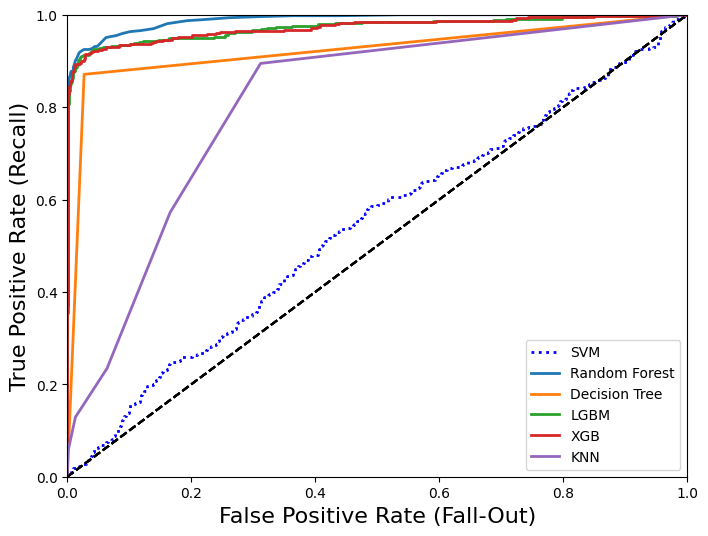

In [974]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SVM")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_tree, tpr_tree, "Decision Tree")
plot_roc_curve(fpr_lgbm, tpr_lgbm, "LGBM")
plot_roc_curve(fpr_xgb, tpr_xgb, "XGB")
plot_roc_curve(fpr_knn, tpr_knn, "KNN")
plt.legend(loc="lower right")
plt.show()      

On décide de notre meilleur modèle selon l'aire sous la courbe ci-dessus : On remarque que la courbe bleue claire est celle avec la plus grande aire sous la courbe, en effet elle dépasse la verte et la rouge sur la partie en haut à gauche du graphique.

On peut donc conclure que le plus adapté dans notre cas de figure est le Random Forest, il a des bons indicateurs avec la meilleure Accuracy, Precision et AUC mais XGB possède un meilleur Recall et score F1. Le deuxième plus adapté serait dong le XGB.

On va maintenant essayer de régler les paramètres de notre Random Forest afin de l'optimiser  et d'obtenir des résultats encore meilleurs.

# 6: *Amélioration du modèle choisi*

Pour l'améliorer on cherche a modifier nos paramètres, afin de trouver ces paramètres de manière optimale on randomise leurs valeurs et on regarde avec lesquels nous obtenons les meilleurs résultats, ce travail est fait automatiquement avec "rnd_search.best_params_".

Ci-dessous on fait cette randomisation 100 fois ce qui dure déjà quelques minutes mais nous assure des bons paramètres.

In [975]:
# try RandomizesearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_clf = RandomForestClassifier(random_state=42)

rnd_search = RandomizedSearchCV(forest_clf, param_distributions=param_distribs,
                                n_iter=100, cv=5, scoring='roc_auc', random_state=42)
rnd_search.fit(X_train, y_train)

feature_importances = rnd_search.best_estimator_.feature_importances_

sorted(zip(feature_importances, data_prepared.columns), reverse=True)

[(0.08016746541454085, 'daily_working_hours'),
 (0.0700303905691678, 'Age'),
 (0.06458006982104342, 'TotalWorkingYears'),
 (0.05828027675570303, 'MonthlyIncome'),
 (0.05087405418333939, 'YearsAtCompany'),
 (0.04862859492287189, 'DistanceFromHome'),
 (0.04394487684212622, 'YearsWithCurrManager'),
 (0.0425417543864613, 'PercentSalaryHike'),
 (0.037619054590161134, 'NumCompaniesWorked'),
 (0.035747911913124, 'EnvironmentSatisfaction'),
 (0.03401178565304209, 'JobSatisfaction'),
 (0.03292916502783769, 'YearsSinceLastPromotion'),
 (0.03100964029884372, 'TrainingTimesLastYear'),
 (0.030311990706369165, 'WorkLifeBalance'),
 (0.02950519703663007, 'Education'),
 (0.027623137075330505, 'JobLevel'),
 (0.025391436849899158, 'StockOptionLevel'),
 (0.025093348094716736, 'JobInvolvement'),
 (0.02068418065106197, 'MaritalStatus_Single'),
 (0.020426754052536144, 'BusinessTravel'),
 (0.014748171441800302, 'Gender'),
 (0.013855711164242644, 'MaritalStatus_Married'),
 (0.012605769452165665, 'JobRole_Sales

In [976]:
best_param = rnd_search.best_params_
best_param

{'max_features': 2, 'n_estimators': 190}

On va ensuite intégrer ces nouveaux paramètres à notre modèle de Random Forest.

In [980]:
# try RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

forest_clf_final = RandomForestClassifier(random_state=42, max_features=2, n_estimators= 190)
y_probas_forest_final = cross_val_predict(forest_clf_final, X_train, y_train, cv=10, method="predict_proba")

y_scores_forest_final = y_probas_forest_final[:, 1] # score = proba of positive class
fpr_forest_final, tpr_forest_final, thresholds_forest_final = roc_curve(y_train, y_scores_forest_final)

y_probas_forest_final = cross_val_predict(forest_clf_final, X_train, y_train, cv=10)

Final_results = np.array([['Model','Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC']])
Final_results = np.append(Final_results, [['Random Forest Final',accuracy_score(y_train, y_probas_forest_final) ,precision_score(y_train, y_probas_forest_final), recall_score(y_train, y_probas_forest_final), f1_score(y_train,y_probas_forest_final), roc_auc_score(y_train, y_scores_forest_final)]], axis=0)
Final_results = np.append(Final_results, [['Random Forest Before' ,accuracy_score(y_train, y_probas_forest) ,precision_score(y_train, y_probas_forest), recall_score(y_train, y_probas_forest), f1_score(y_train,y_probas_forest), roc_auc_score(y_train, y_scores_forest)]], axis=0)


Et enfin, on compare les résultats avant et après l'amélioration de notre modèle.

On remarque que l'accuracy ne change pas, la précision s'améliore légèrement et le recall diminue un peu.
Globalement le modèle s'est un petit peu amélioré mais peu car il est déjà très performant de base.

In [981]:
pd.DataFrame(Final_results).sort_values(by=[1], ascending=False)

,0,1,2,3,4,5
0,Model,Accuracy,Precision,Recall,F1,ROC-AUC
1,Random Forest Final,0.9730687455705174,0.9974424552429667,0.8387096774193549,0.911214953271028,0.9907911004055638
2,Random Forest Before,0.9723600283486888,0.9898734177215189,0.8408602150537634,0.9093023255813953,0.9892304323429181


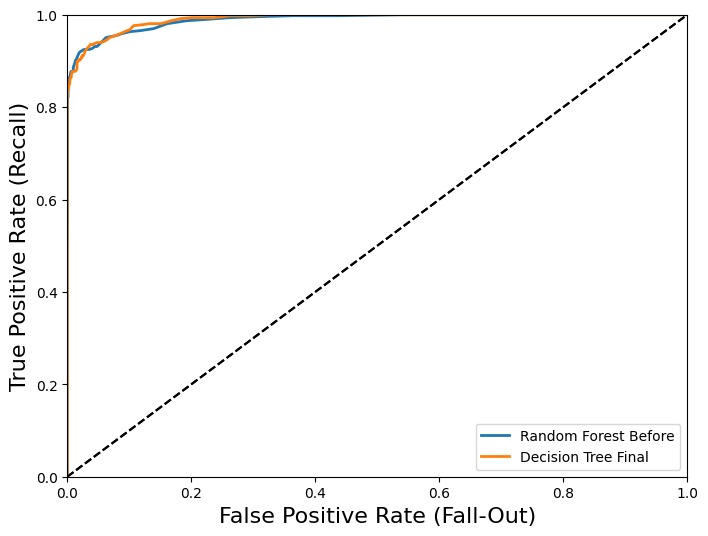

In [982]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest Before")
plot_roc_curve(fpr_forest_final, tpr_forest_final, "Decision Tree Final")
plt.legend(loc="lower right")
plt.show()    